# 1. Install and Import Dependencies

In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import easyocr

# We will create a function for plotting

In [2]:
def plot_images(img1, img2, title1="", title2=""):
        fig = plt.figure(figsize=[15,15])
        ax1 = fig.add_subplot(121)
        ax1.imshow(img1, cmap="gray")
        ax1.set(xticks=[], yticks=[], title=title1)

        ax2 = fig.add_subplot(122)
        ax2.imshow(img2, cmap="gray")
        ax2.set(xticks=[], yticks=[], title=title2)

# 2. Read the Image and Convert it to Grayscale

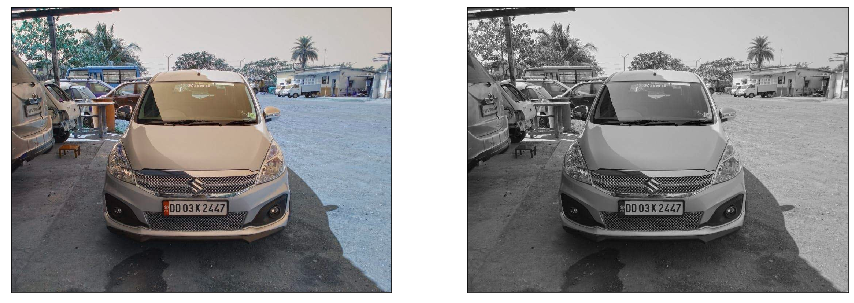

In [3]:
image = cv2.imread("img3.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_images(image, gray)

# 3. Apply filter and find edges

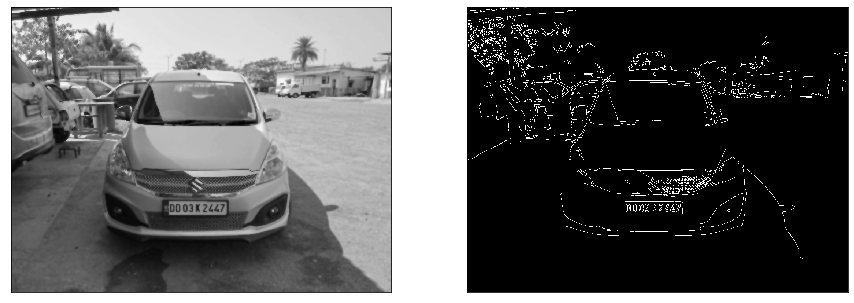

In [4]:
blur = cv2.bilateralFilter(gray, 9,75, 75)        
edges = cv2.Canny(blur, 62, 220)
plot_images(blur, edges)

# 4. Find Contours and plot them on both original and edges image

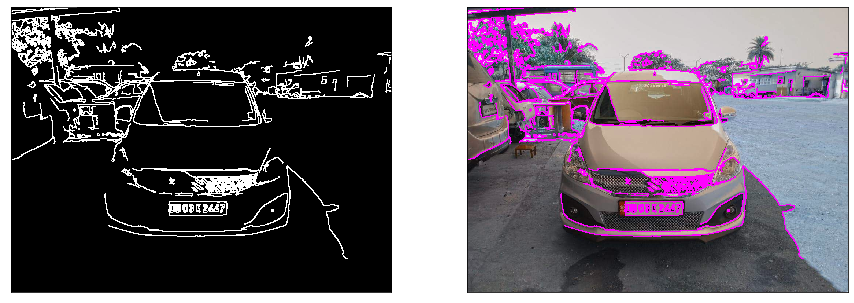

In [5]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
edges_copy = edges.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
_ = cv2.drawContours(edges_copy, cnts, -1, (255,0,255),2)
plot_images(edges_copy, image_copy)

# 5.Sort the contours, take top 40 contours and now plot only top 40 contours

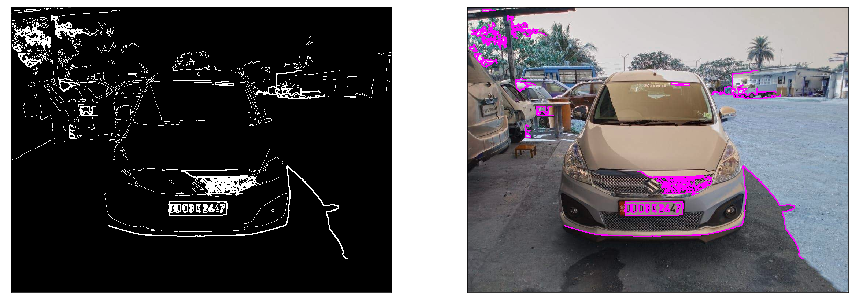

In [6]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:40]
image_copy = image.copy()
edges_copy = edges.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
_ = cv2.drawContours(edges_copy, cnts, -1, (255,0,255),2)
plot_images(edges_copy, image_copy)

# 6.Find out the contour whose length=4 in close loop

In [7]:
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        contour = c
        break

# 7.Find out the cordinates of the image, nothing but your number plate and crop it

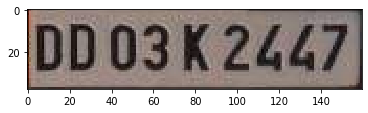

In [8]:
x,y,w,h = cv2.boundingRect(contour)
plate = image[y:y+h, x:x+w]
plt.imshow(plate, cmap="gray")

# 8.Call easyocr to extract the text from the image

In [9]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 1], [159, 1], [159, 37], [0, 37]], 'DD 03 K2447', 0.8859902259285788)]

# 9.Finally extract your vehicle number

In [10]:
import itertools
merged = list(itertools.chain(*result))
number = ""
for i in merged:
    if type(i) == str:
        number = number + i
        number = number + " "
number = number.split()
number = ' '.join(number)
number

'DD 03 K2447'

# 10.Print the vehicle number on the original image

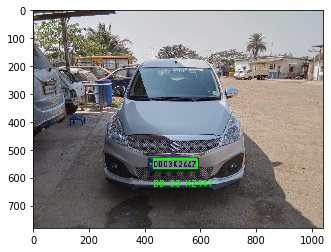

In [11]:
text = number
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(edges_count[0][0][0], edges_count[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(edges_count[0][0]), tuple(edges_count[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))